# Fashion MNIST

In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train = X_train[:10000]
y_train = y_train[:10000]

X_test = X_test[:10000]
y_tets = y_test[:10000]

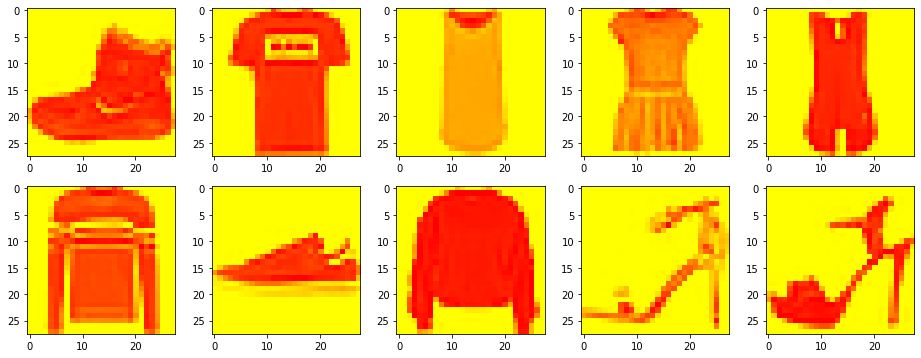

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i,:], cmap='autumn_r')

In [11]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train.shape

(10000, 784)

Масштабировать не нужно

## Обучение модели

In [12]:
%%time
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

CPU times: user 6.62 s, sys: 53.1 ms, total: 6.67 s
Wall time: 6.98 s


DecisionTreeClassifier(random_state=1)

In [13]:
pred_train = model.predict(X_train)
pred_train

array([9, 0, 0, ..., 0, 6, 6], dtype=uint8)

In [14]:
train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train

train_preds

,pred,true
0,9,9
1,0,0
2,0,0
3,3,3
4,0,0
...,...,...
9995,7,7
9996,5,5
9997,0,0
9998,6,6


## Валидация

In [15]:
pred_test = model.predict(
    X_test
)

In [16]:
test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds['true'] = y_test

test_preds

,pred,true
0,9,9
1,4,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,3,1
9997,8,8
9998,1,1


In [17]:
from sklearn.metrics import accuracy_score

print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 1.0
Accuracy модели на тестовой выборке 0.7431


<img src='https://wiki.loginom.ru/images/overtraining.svg'>

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plot_tree(model, max_depth=1);

## Снижение переобучения

In [23]:
%%time
model = DecisionTreeClassifier(random_state=1,
                               min_samples_leaf=10,
                               max_depth=8)
model.fit(X_train, y_train)

CPU times: user 3.21 s, sys: 16.3 ms, total: 3.23 s
Wall time: 3.24 s


DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=1)

In [24]:
pred_train = model.predict(X_train)

train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train

train_preds

,pred,true
0,9,9
1,0,0
2,3,0
3,6,3
4,3,0
...,...,...
9995,9,7
9996,5,5
9997,0,0
9998,0,6


## Валидация

In [25]:
pred_test = model.predict(
    X_test
)

test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds['true'] = y_test

test_preds

,pred,true
0,7,9
1,2,2
2,1,1
3,1,1
4,2,6
...,...,...
9995,9,9
9996,3,1
9997,8,8
9998,1,1


In [26]:
from sklearn.metrics import accuracy_score

print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 0.8114
Accuracy модели на тестовой выборке 0.7574


Accuracy модели на обучающей выборке 1.0

Accuracy модели на тестовой выборке 0.7431

Accuracy модели на обучающей выборке 0.8478

Accuracy модели на тестовой выборке 0.7592

In [27]:
from sklearn.model_selection import GridSearchCV

param = {'min_samples_leaf': [1, 3, 5, 7, 10],
 'max_depth': [3, 5, 8, 15]}

gs = GridSearchCV(model, param)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=8, min_samples_leaf=10,
                                              random_state=1),
             param_grid={'max_depth': [3, 5, 8, 15],
                         'min_samples_leaf': [1, 3, 5, 7, 10]})

In [28]:
gs.best_params_

{'max_depth': 8, 'min_samples_leaf': 10}

# Практическое задание

Визуализация набора данных MNIST

In [29]:
from sklearn import datasets


digits = datasets.load_digits()
X = digits.data
y = digits.target

In [30]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
X.shape

(1797, 64)

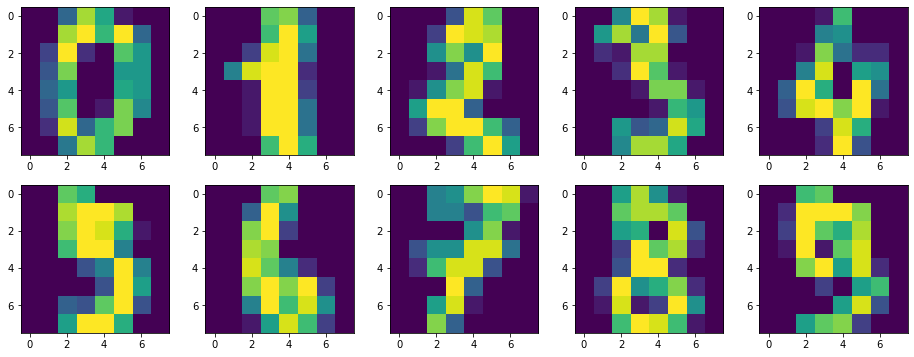

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

### train test split

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

(<matplotlib.image.AxesImage at 0x7efde492c710>, 6)

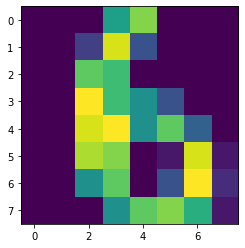

In [56]:
i = np.random.randint(x_train.shape[0])
plt.imshow(x_train[i].reshape(8,8)), y_train[i]

## Обучение модели

In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=10)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

## Валидация

In [59]:
from sklearn.metrics import accuracy_score

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

print(f'train_acc: {accuracy_score(pred_train, y_train)}')
print(f'test_acc: {accuracy_score(pred_test, y_test)}')

train_acc: 1.0
test_acc: 0.8888888888888888


## Снижение переобучения

In [61]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf': [1, 3, 5, 7, 10], 
          'max_depth': [3, 5, 8, 15]}

gs = GridSearchCV(model, params)
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [3, 5, 8, 15],
                         'min_samples_leaf': [1, 3, 5, 7, 10]})

In [63]:
gs.best_params_

{'max_depth': 15, 'min_samples_leaf': 1}

## Валидация

In [64]:
from sklearn.metrics import accuracy_score

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

print(f'train_acc: {accuracy_score(pred_train, y_train)}')
print(f'test_acc: {accuracy_score(pred_test, y_test)}')

train_acc: 1.0
test_acc: 0.8888888888888888


# Дополнительные материалы:
1. Дерево решений для задачи регрессии https://youtu.be/0mMeaC3gjNI
2. Дерево решений для задачи классификации https://youtu.be/j8L07nuns2Y
3. Критерии останова для дерева решений https://youtu.be/aWEdaXAZ01M
4. Метрика accuracy https://youtu.be/CCH-1gJo_z0
5. Переобучение/недообучение https://youtu.be/m7P7bnLxIc4